In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

c:\Users\fedor\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No pygame installed, ignoring import


In [524]:
%%writefile rock_agent.py
#Агент всегда дающий камень

def your_agent(observation, configuration):
    return 0

Overwriting rock_agent.py


In [525]:
%%writefile paper_agent.py
#Агент всегда дающий бумагу

def your_agent(observation, configuration):
    return 1

Overwriting paper_agent.py


In [526]:
%%writefile scissors_agent.py
#Агент всегда дающий ножницы

def your_agent(observation, configuration):
    return 2

Overwriting scissors_agent.py


In [527]:
%%writefile last_react_agent.py
#Агент всегда опирающийся на последний ход соперника
import random
random.seed(112324124)

def get_score(agent_action, opponent_action):
    '''
    Функция для расчета счета
    '''
    if (agent_action == 0 and opponent_action == 2) or \
        (agent_action == 2 and opponent_action == 1) or \
        (agent_action == 1 and opponent_action == 0):
        reward = 1  # Победа
    elif agent_action == opponent_action:
        reward = 0  # Ничья
    else:
        reward = -1  # Поражение
    return reward

last_react_action = None

def reactionary(observation, configuration):
    global last_react_action
    if observation.step == 0:
        last_react_action = random.randrange(0, configuration.signs)
    elif get_score(last_react_action, observation.lastOpponentAction) <= 1:
        last_react_action = (observation.lastOpponentAction + 1) % configuration.signs

    return last_react_action

Overwriting last_react_agent.py


In [528]:
%%writefile counter_reactionary_agent.py
#Агент всегда опирающийся на последний ход соперника
import random
random.seed(112324124)

def get_score(agent_action, opponent_action):
    '''
    Функция для расчета счета
    '''
    if (agent_action == 0 and opponent_action == 2) or \
        (agent_action == 2 and opponent_action == 1) or \
        (agent_action == 1 and opponent_action == 0):
        reward = 1  # Победа
    elif agent_action == opponent_action:
        reward = 0  # Ничья
    else:
        reward = -1  # Поражение
    return reward

last_counter_action = None

def counter_reactionary(observation, configuration):
    global last_counter_action
    if observation.step == 0:
        last_counter_action = random.randrange(0, configuration.signs)
    elif get_score(last_counter_action, observation.lastOpponentAction) == 1:
        last_counter_action = (last_counter_action + 2) % configuration.signs
    else:
        last_counter_action = (observation.lastOpponentAction + 1) % configuration.signs

    return last_counter_action

Overwriting counter_reactionary_agent.py


In [529]:
%%writefile statisticaly_agent.py
#Агент всегда опирающийся на Статистику ходов соперника

action_histogram = {}

def statistical(observation, configuration):
    global action_histogram
    if observation.step == 0:
        action_histogram = {}
        return
    action = observation.lastOpponentAction
    if action not in action_histogram:
        action_histogram[action] = 0
    action_histogram[action] += 1
    mode_action = None
    mode_action_count = None
    for k, v in action_histogram.items():
        if mode_action_count is None or v > mode_action_count:
            mode_action = k
            mode_action_count = v
            continue

    return (mode_action + 1) % configuration.signs

Overwriting statisticaly_agent.py


In [530]:
%%writefile order_agent.py

class Order_agent():
  def __init__(self) -> None:
      '''
      Агент декйствует по порядку камень-ножницы-бумага
      '''
      self.action = 0

  def act(self):
    if self.action == 0:
      self.action = 1
      return 1
    elif self.action == 1:
      self.action = 2
      return 2
    elif self.action == 2:
      self.action = 0
      return 0

agent = Order_agent()

#Example
def order_act(observation, configuration):
    return agent.act()

Overwriting order_agent.py


In [531]:
%%writefile random_agent.py
#Агент, выбирающий свое решение случайным образом
import random
random.seed(112324124)

#агент принимает решение случайным образом
def random_act(observation, configuration):
    return random.choice([0,1,2])

Overwriting random_agent.py


In [532]:
%%writefile agent.py

import random
import time
random.seed(37057087388379217268129464)

class Agent:
    def __init__(self):
        # Стратегия: вероятности выбора rock, paper, scissors
        # Инициализация агента с параметрами обучения и начальным состоянием
        self.learning_rate = 0.8 # Скорость обучения агента
        self.discount_factor = 0.2 # Коэффициент дисконтирования для будущих вознаграждений
        self.epsilon = 0.1 # Реализуем жадную стратегию. Вероятность выбора случайного действия (exploration)

         # Начальное состояние и действие агента выбираются случайным образом
        self.state = random.choice([0, 1, 2]) # Состояния: 0 - камень, 1 - бумага, 2 - ножницы
        self.action = random.choice([0, 1, 2]) # Действия: 0 - камень, 1 - бумага, 2 - ножницы
        
         # Таблица значений для состояний и действий (начальные вероятности равны)
        self.value_table = {0: 
                                {0: 1/3,
                                 1: 1/3,
                                 2: 1/3},
                            1: 
                                {0: 1/3,
                                 1: 1/3,
                                 2: 1/3},
                            2: 
                                {0: 1/3,
                                 1: 1/3,
                                 2: 1/3}}

    def update_value(self, reward):
        # Метод для обновления значений в таблице на основе полученного вознаграждения
        pass

    def __choose_action(self):
        # Метод для выбора действия на основе текущего состояния и стратегии ε-greedy
        
        if self.epsilon < random.random(): 
            # Если не выбираем случайное действие, выбираем действие с максимальным значением    
            max_value = max(self.value_table[self.state].values())  # Находим максимальное значение
            keys_with_max_value = [key for key, value in self.value_table[self.state].items() if value == max_value]
            return random.choice(keys_with_max_value) # Случайный выбор среди действий с максимальным значением
        else:
            return random.choice([0, 1, 2]) # Случайный выбор действия для исследования
        
    def act(self):
        # Метод для выполнения действия агентом
        self.action = self.__choose_action()
        return self.action
    
    def fit(self, state):
        # Метод для обновления состояния агента на основе результата игры
        if (self.action == 0 and state == 2) or \
           (self.action == 2 and state == 1) or \
           (self.action == 1 and state == 0):
            reward = 1  # Победа
        elif self.action == state:
            reward = 0  # Ничья
        else:
            reward = -1  # Поражение

        self.update_value(reward) # Обновление значений на основе вознаграждения
        self.state = state # Обновление текущего состояния агента



Overwriting agent.py


In [533]:
%%writefile agentq.py
#Реализуем стратегию Q-обучения

#Импортируем класс, от которого наследуемся
from agent import Agent
class AgentQ(Agent):
    def __init__(self):
        super().__init__()

    def update_value(self, reward):
        # Обновляем значение классическим для Q-обучения через функцию Беллмана
        self.value_table[self.state][self.action] += self.learning_rate \
              * (reward + self.discount_factor \
                 * max(self.value_table[self.state], key=self.value_table[self.state].get) \
                    - self.value_table[self.state][self.action])

agentq = AgentQ()             
def act(observation, configuration):
    if observation.step > 0:
        # После первого хода учимся
        agentq.fit(observation.lastOpponentAction)
    return agentq.act()

Overwriting agentq.py


In [534]:
%%writefile agentsarsa.py
#Реализуем стратегию SARSA

#Импортируем класс, от которого наследуемся
from agent import Agent

class AgentSARSA(Agent):
    def __init__(self):
        super().__init__()

    def update_value(self, reward):
        # Обновляем значение классическим для Q-обучения через функцию SARSA
        self.value_table[self.state][self.action] += self.learning_rate \
              * (reward + self.discount_factor \
                 * self.value_table[self.state][self.action] \
                    - self.value_table[self.state][self.action])

agent_sarsa = AgentSARSA()             
def act(observation, configuration):
    if observation.step > 0:
        # После первого хода учимся
        agent_sarsa.fit(observation.lastOpponentAction)
    return agent_sarsa.act()

Overwriting agentsarsa.py


In [535]:
%%writefile agentnoepsilon.py
#Реализуем не жадную стратегию. В таком случае Q-стратегия = SARSA стратегия

from agentq import AgentQ

class AgentNoEpsilon(AgentQ):
    def __init__(self):
        super().__init__()
        # Обнуляем эпсилон
        self.epsilon = 0

agent_no_epsilon = AgentNoEpsilon()             
def act(observation, configuration):
    if observation.step > 0:
        # После первого хода учимся
        agent_no_epsilon.fit(observation.lastOpponentAction)
    return agent_no_epsilon.act()

Overwriting agentnoepsilon.py


In [536]:
%%writefile agentlamda.py
#Реализуем

class AgentLambdaWatkins(Agent):
    def __init__(self):
        super().__init__()
        self.lambd = 0.9
        self.E = {0: 
                    {0: 1/3,
                        1: 1/3,
                        2: 1/3},
                1: 
                    {0: 1/3,
                        1: 1/3,
                        2: 1/3},
                2: 
                    {0: 1/3,
                        1: 1/3,
                        2: 1/3}}
        
    def update_value(self, reward):
        delta = self.learning_rate \
              * (reward + self.discount_factor \
                 * max(self.value_table[self.state], key=self.value_table[self.state].get) \
                    - self.value_table[self.state][self.action])
        
        self.E[self.state][self.action] += 1

        for s in self.value_table.keys():
            for a in self.value_table[s].keys():
                self.value_table[s][a] += self.learning_rate * delta * self.E[s][a]
                self.E[s][a] *= self.discount_factor * self.lambd

agent_lambda = AgentLambdaWatkins()             
def act_lambda(observation, configuration):
    if observation.step > 0:
        agent_lambda.fit(observation.lastOpponentAction)
    return agent_lambda.act()

Overwriting agentlamda.py


In [537]:
%%writefile agentrare.py
#Стратегия выбора либо успешного хода, либо самого редкого

import random
random.seed(21498397587320590390394382)

class AgentRare():
    def __init__(self) -> None:
        self.action = random.choice([0, 1, 2]) # Случайный выбор начального действия (0, 1 или 2)
        self.action_history = {0: 0,
                                1: 0,
                                2: 0}
        
    def act(self, state):
        # Метод для выполнения действия на основе текущего состояния
        self.action_history[self.action] += 1 # Увеличиваем счетчик для текущего действия

        # Определение вознаграждения на основе текущего действия и состояния
        if (self.action == 0 and state == 2) or \
           (self.action == 2 and state == 1) or \
           (self.action == 1 and state == 0):
            reward = 1  # Победа
        elif self.action == state:
            reward = 0  # Ничья
        else:
            reward = -1  # Поражение

        # Если агент выиграл, возвращаем текущее действие
        if reward == 1:
            return self.action
        
        else:
            # Находим минимальное количество выполнений среди всех действий
            min_value = min(self.action_history.values())  # Находим максимальное значение
            # Находим все действия с минимальным количеством выполнений
            keys_with_max_value = [key for key, value in self.action_history.items() if value == min_value]
            # Случайным образом выбираем одно из действий с минимальным количеством выполнений
            self.action = random.choice(keys_with_max_value)
            return self.action

agent_rare = AgentRare()             
def act_rare(observation, configuration):
    if observation.step > 0:
        return agent_rare.act(observation.lastOpponentAction)
    return agent_rare.action

Overwriting agentrare.py


In [447]:
# Формируем набор стратегий
agents = {'rock': 'rock_agent.py',
          'paper': 'paper_agent.py',
          'scissors': 'scissors_agent.py',
          'last_react_agent': 'last_react_agent.py',
          'counter': 'counter_reactionary_agent.py',
          'statisticaly': 'statisticaly_agent.py',
          'order': 'order_agent.py',
          'random': 'random_agent.py',
          'q': 'agentq.py',
          'sarsa': 'agentsarsa.py',
          'qnoepsilon': 'agentnoepsilon.py',
          'qlamda': 'agentlamda.py',
          'rare': 'agentrare.py'
          }

results = {}

In [479]:
#Сталкиваем каждого агента с каждым
victory = []
for agent_1 in agents.keys():
    for agent_2 in agents.keys():
        result =  int(evaluate(
                        "rps", #environment to use - no need to change
                        [agents[agent_1], agents[agent_2]], #agents to evaluate
                        configuration={"episodeSteps": 1_000+1,} #number of episodes
                    )[0][0])

        victory += [result]
    results[agent_1] = victory
    victory = []

In [480]:
# Выведем итоги агентов
result_df = pd.DataFrame(results)
result_df.index = agents.keys()
result_df = result_df.T
result_df.style.background_gradient(cmap='Blues', )

,rock,paper,scissors,last_react_agent,counter,statisticaly,order,random,q,sarsa,qnoepsilon,qlamda,rare
rock,0,-1000,1000,-998,-499,-999,0,-26,-895,-899,-1000,-898,-999
paper,1000,0,-1000,-1000,-500,-998,0,0,-901,-914,-999,-903,-997
scissors,-1000,1000,0,-999,-500,-1000,0,0,-900,-906,-995,-910,-1000
last_react_agent,998,1000,999,0,0,598,0,0,117,157,249,379,53
counter,499,500,500,0,0,0,0,0,-387,-398,-496,-391,259
statisticaly,999,998,1000,-598,0,0,0,0,-300,-416,0,-351,-498
order,0,0,0,0,0,0,0,0,-889,-910,-992,-899,-223
random,26,0,0,0,0,0,0,30,0,0,-43,0,0
q,889,907,914,-106,399,260,886,0,0,-31,727,-57,112
sarsa,880,893,919,-159,403,364,886,0,137,0,410,123,25


<Axes: >

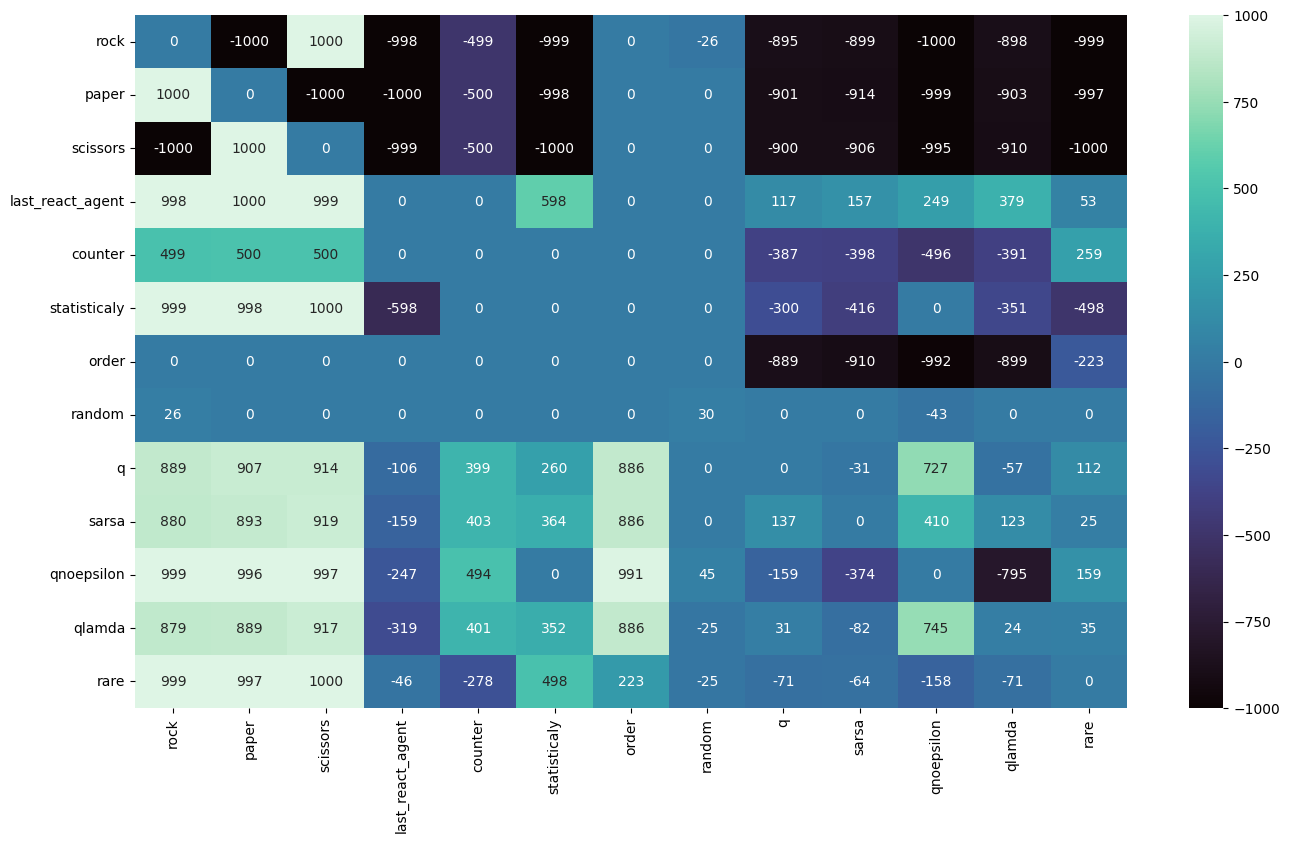

In [493]:
# Выведем итоги агентов
plt.figure(figsize=(16,9))
ax = sns.heatmap(result_df, annot=True, fmt='.0f', cmap="mako")
ax

<Axes: xlabel='Стратегия', ylabel='Счет'>

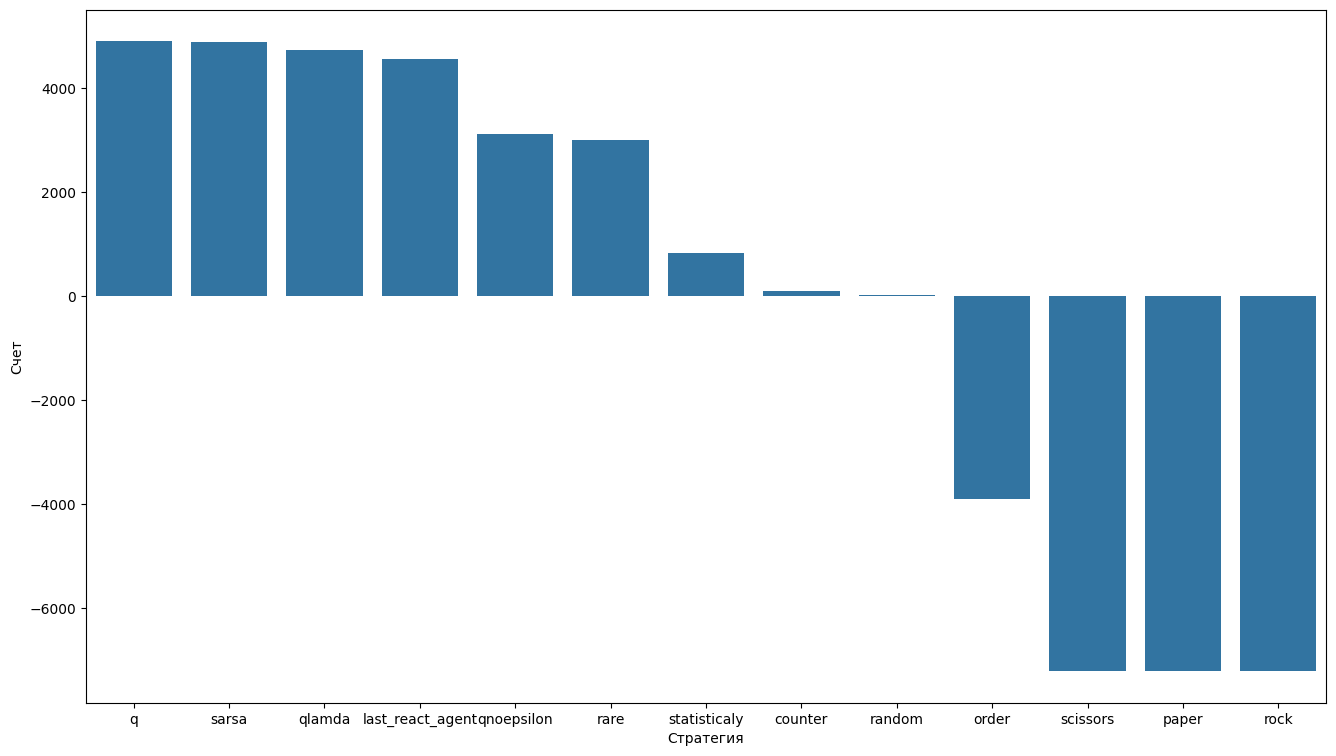

In [523]:
# Построи гистограмму по стратегиям с суммой баллов
hist_df = result_df.sum(axis = 1)
plt.figure(figsize=(16,9))
ax = sns.barplot(hist_df.sort_values(ascending=False))
ax.set(xlabel='Стратегия', ylabel='Счет')
ax

Вывод:
Еаилучшие результаты показали классические алгоритмы Q-обучения - уравнение Беллмана и Sarsa.